Методы и алгоритмы обработки слабоструктурированных данных
Лабораторная работа №3 
Болотов М.В. АСУ4-22-1м

In [22]:
import yaml                                                    # Импортируем модуль для работы с YAML
from typing import List, Tuple                                 # Импортируем тип List из модуля typing для аннотаций типов
import matplotlib.pyplot as plt                                # Импортируем модуль для построения графиков
from dataclasses import dataclass                              # Импортируем декоратор dataclass для создания структуры данных

In [23]:
@dataclass                                                     # Создаем структуру данных для представления точки временного ряда
class DataPoint:
    date: str                                                  # Дата показания влажности 
    value: float                                               # Значение показания влажности  

@dataclass                                                     # Создаем структуру данных для представления временного ряда
class TimeSeries:
    name: str                                                  # Имя временного ряда
    data: List[DataPoint]                                      # Данные временного ряда (влажность полотна)

In [24]:
def parse_yaml_file(file_path: str) -> List[TimeSeries]:                     # Функция для парсинга YAML-файла и создания списка временных рядов
    with open(file_path, 'r') as file:
        yaml_data = yaml.safe_load(file)                                     # Загружаем данные из YAML-файла
    
    time_series_list = []                                                    # Создаем пустой список для временных рядов
    for series_data in yaml_data:                                            # Перебираем данные о временных рядах из YAML
        name = series_data['name']                                           # Получаем имя временного ряда
        data = [DataPoint(date=point['date'], value=point['value']) for point in series_data['data']]    # Создаем список точек ряда
        time_series_list.append(TimeSeries(name=name, data=data))            # Добавляем временной ряд в список
    
    return time_series_list                                                  # Возвращаем список временных рядов

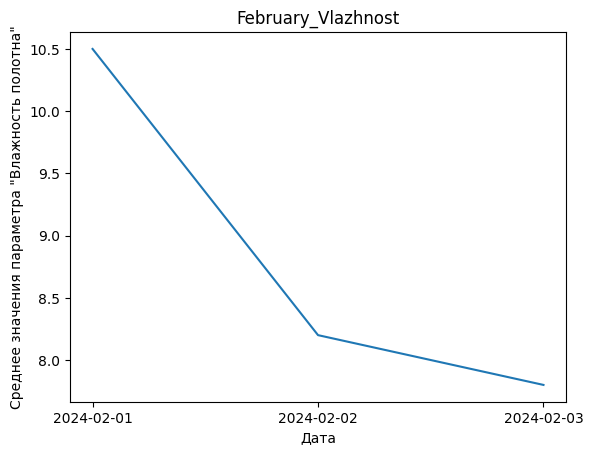

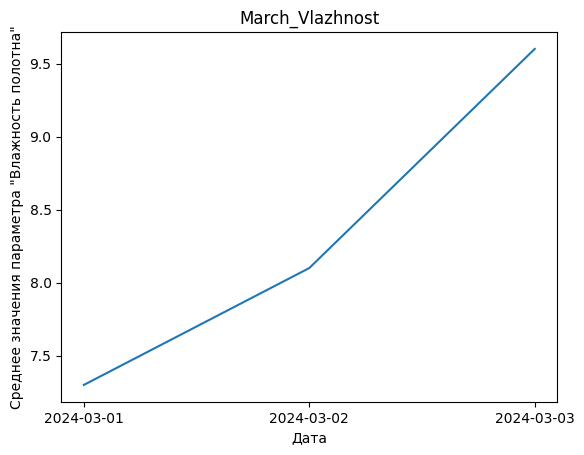

In [25]:
def plot_time_series(time_series: TimeSeries):                               # Функция для построения графика временного ряда
    dates = [point.date for point in time_series.data]                       # Получаем список дат из временного ряда
    values = [point.value for point in time_series.data]                     # Получаем список значений из временного ряда

    plt.plot(dates, values)                                                  # Строим график
    plt.xlabel('Дата')                                                       # Задаем подпись для оси X
    plt.ylabel('Среднее значения параметра "Влажность полотна"')             # Для оси Y
    plt.title(time_series.name)                                              # Задаем заголовок графика (в файле ямл)
    plt.show()                                                               # Отображаем график

file_path = r"C:\Users\79125\OneDrive\Рабочий стол\Учёба ПНИПУ АСУ\4 семестр\Методы и алгоритмы обработки слабоструктурированных данных\lr3\vlazhnost kartona.yaml"   # Путь к YAML-файлу с данными о временных рядах
time_series_list = parse_yaml_file(file_path)                                # Получаем список временных рядов из YAML-файла

for time_series in time_series_list:                                         # Для каждого временного ряда строим график
    plot_time_series(time_series)